Welcome to the Convergent Wisdom project! This module presents a sample word cloud sentiment analysis of a 92-sentence story about world unity generated by artificial intelligence, located in the samplesentimentanalysis.csv file in the Github repository. Non-word cloud sentiment analyses are located in the Sample Sentiment Analysis module.

Word cloud methods are applied to the study of the Bhagavad Gita (Hinduism), Qur'an (Islam), and Bible (Christianity) in a separate module.

In [2]:
import pandas as pd
import requests
from io import StringIO

github_csv_url_Gita = 'https://raw.githubusercontent.com/justinjunge/Convergent-Wisdom-Project/master/samplesentimentanalysis.csv'
response1 = requests.get(github_csv_url_Gita)
if response1.status_code == 200:
  df = pd.read_csv(StringIO(response1.text))
else:
  print('Failed to fetch CSV File from Github')

print(df)

    Number                                               Text
0        1  In a not-so-distant future, the world was on t...
1        2  The planet had seen its fair share of conflict...
2        3  The idea of global unity had taken root in the...
3        4  The story begins in a small village nestled in...
4        5  A young girl named Aria lived there, surrounde...
..     ...                                                ...
87      88  The world became a tapestry of diverse culture...
88      89  Despite the challenges that remained, the worl...
89      90  The vision of the ancient prophecy had become ...
90      91  People looked to the future with hope and dete...
91      92  The global symphony of unity continued to play...

[92 rows x 2 columns]


Great! Now that we have our text file, we will import the necessary libraries and first create a word cloud of the entire text.

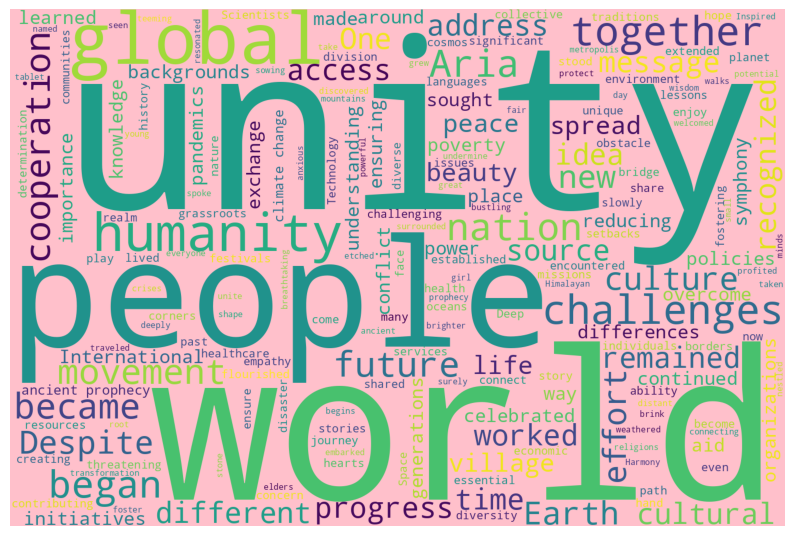

In [3]:
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud

dev = df.Text
output = ''

for line in dev:
        output += '{} '.format(line)

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width = 1500, height = 1000, background_color='pink').generate(output)
plot_cloud(wordcloud)

In this whole-text word cloud, we see that 'unity' and 'world' stand out. This makes sense as we did ask artificial intelligence to generate a story about world unity.

Pretty cool, right? Now, we can combine this code with tools from SentimentIntensityAnalyzer to create positive, negative, and neutral word clouds of the text. This allows us to visualize the distribution of emotional language throughout the story, with particular emphasis on highlighting what most positive and most negative sentiments drive the tale.

We will first create a word cloud that shows the frequency of words with positive sentiment in the text.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Positive : ['fair', 'share', 'Inspired', 'welcomed', 'Harmony,', 'importance', 'ensure', 'festivals,', 'peace', 'value', 'perfect', 'peacemakers', 'natural', 'ability', 'remarkable', 'energy', 'protected,', 'positive', 'shared', 'dream', 'peaceful', 'intelligence', 'Ethical', 'celebrated', 'festivals', 'appreciate', 'beauty', 'focused', 'clean', 'compassion', 'kindness', 'generosity', 'Charitable', 'vision', 'hope']
Neutral : ['0', 'In', 'a', 'not-so-distant', 'future,', 'the', 'world', 'was', 'on', 't...', '1', 'The', 'planet', 'had', 'seen', 'its', 'of', 'conflict...', '2', 'The', 'idea', 'of', 'global', 'unity', 'had', 'taken', 'root', 'in', 'the...', '3', 'The', 'story', 'begins', 'in', 'a', 'small', 'village', 'nestled', 'in...', '4', 'A', 'young', 'girl', 'named', 'Aria', 'lived', 'there,', 'surrounde...', '5', 'One', 'day,', 'Aria', 'discovered', 'an', 'ancient', 'prophecy', 'e...', '6', 'It', 'spoke', 'of', 'a', 'time', 'when', 'humanity', 'would', 'unite', 'a...', '7', 'by', '

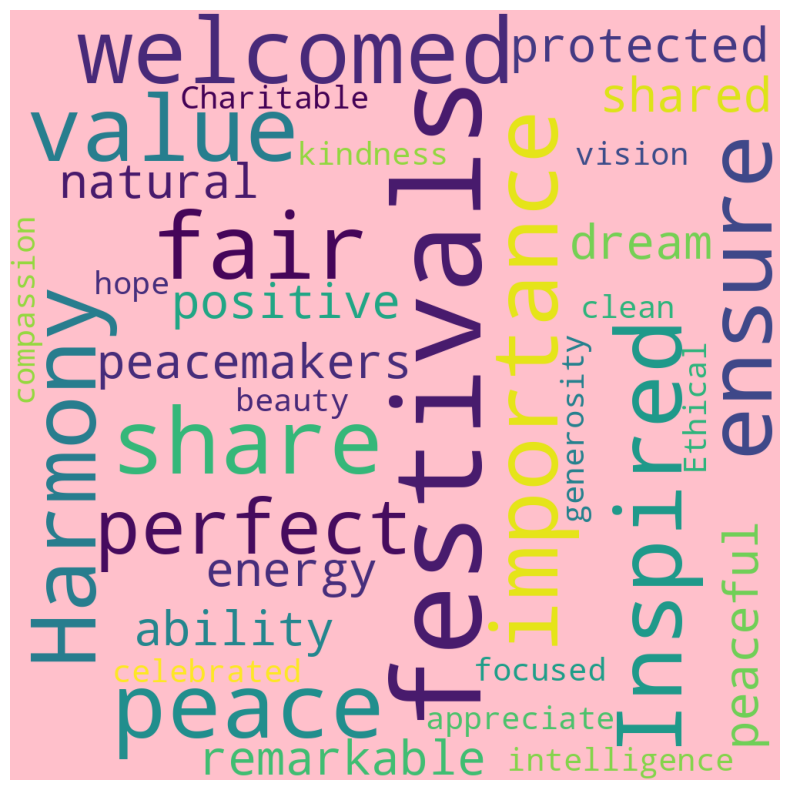

In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

wordStory = df.Text
wordStory = wordStory.to_string()

for word in wordStory.split():
    if (sid.polarity_scores(word)['compound']) >= 0.25:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.25:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)

print('Positive :',pos_word_list)
print('Neutral :',neu_word_list)
print('Negative :',neg_word_list)

sposdf = pd.DataFrame (pos_word_list, columns = ['words'])

output2 = ''

for line in sposdf.words:
        output2 += '{} '.format(line)

def plot_cloud(wordcloud2):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud2)
    plt.axis("off");
wordcloud2 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output2)
plot_cloud(wordcloud2)

In this positive word cloud, we see that 'festivals,' 'peace,' and 'harmony' stand out. 'Share,' 'fair,' and 'value' are also quite large. This helps gives us an idea of the definition that 'world unity' takes on in this story.

Next, we will create a word cloud that shows the frequency of words with negative sentiment in the text.

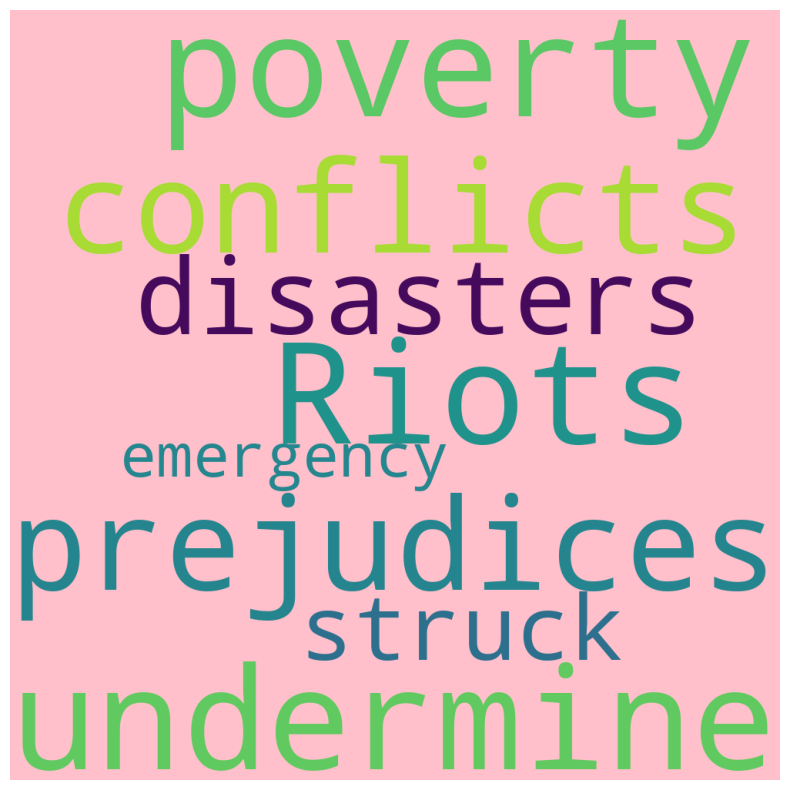

In [7]:
snegdf = pd.DataFrame (neg_word_list, columns = ['words'])

output3 = ''

for line in snegdf.words:
        output3 += '{} '.format(line)

def plot_cloud(wordcloud3):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud3)
    plt.axis("off");
wordcloud3 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output3)
plot_cloud(wordcloud3)

In this negative word cloud, we see that the SentimentIntensityAnalyzer identifies relatively few negative words in the story about world unity.

Finally, we will create a word cloud that shows the frequency of words with neutral sentiment in the text.

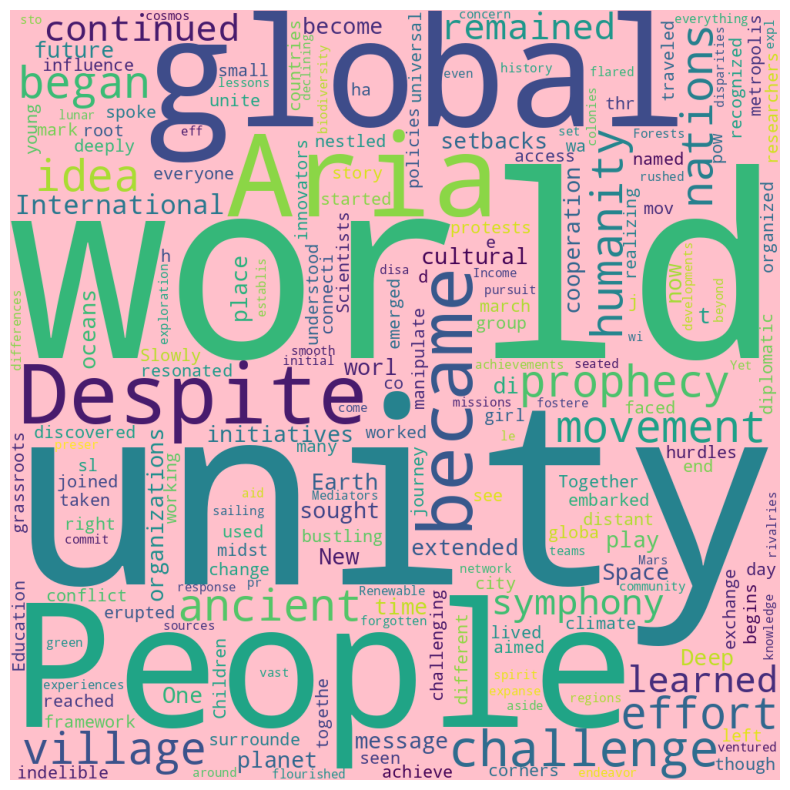

In [8]:
sneudf = pd.DataFrame (neu_word_list, columns = ['words'])

output4 = ''

for line in sneudf.words:
        output4 += '{} '.format(line)

def plot_cloud(wordcloud4):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud4)
    plt.axis("off");
wordcloud4 = WordCloud(width = 1000, height = 1000, background_color='pink', collocations=False).generate(output4)
plot_cloud(wordcloud4)

In this neutral word cloud, we see that the density of the figure implies that SentimentIntensityAnalyzer believes that most words in the story carry a neutral sentiment.

As you can see, word clouds are a highly effective (and interesting!) way to quickly visualize the distribution of emotional language throughout a text. On a larger scale, word clouds can also portray thematic elements and stylistic quirks of a text. There are many ways such visualizations could be beneficial in the toolbox of a psychologist or any professional who analyzes large amounts of data or needs to quickly assess patterns. These methods are applied to the study of religious texts in a future module.